# IPBMA_6: Projection Radiography

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [68]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [33]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)


250 12.0


BREAST PHANTOM

In [34]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= breast_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_adipose: 2.2720000000000002
coef_breast: 3.1907639999999997
coef_soft: 4.14142


QUANTUM IMAGE. FRONTAL VIEW.

In [35]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

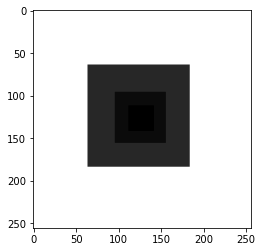

In [36]:
plt.imshow(qImage, cmap="gray")
plt.show()

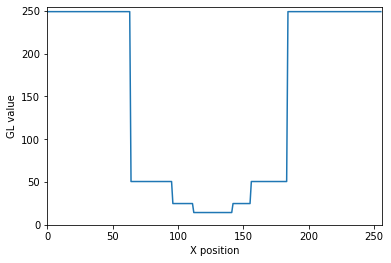

In [37]:
line = plotLineH(qImage, 128)

In [38]:
# Get Distribution of Celss per Photons
nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


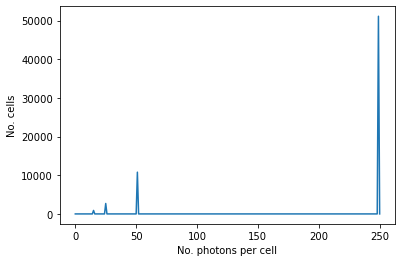

In [39]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

QUANTUM IMAGE. LATERAL VIEW.

In [40]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

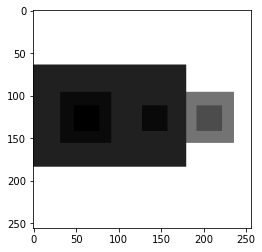

In [41]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

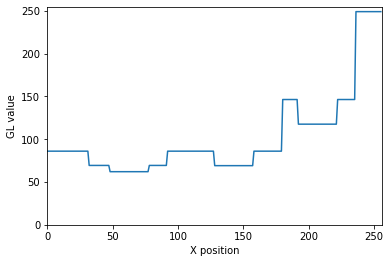

In [42]:
plotLineH(qImage, 128)

Microcalcifications Insertion

In [43]:
fName= "./coefs/coefAtenuacionCalcium.csv"
mu= getCoef(fName, eE)
sArtifact= 2

In [44]:
pos_1= [63, 125, 125]
obj_microCal= insertArtifact(obj, pos_1, sArtifact, mu)

pos_2= [143, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_2, sArtifact, mu)

pos_3= [207, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_3, sArtifact, mu)

In [45]:
qImage= interactor_PR(N0, obj_microCal, prj)

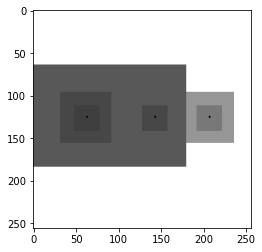

In [76]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

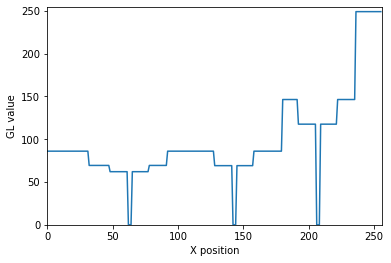

In [77]:
plotLineH(qImage, 125)

DETECTED IMAGE

In [131]:
# Detection
# dImage -> The detected image, without noise.
f= 2
dImage= detector(qImage, int(size/f), int(size/f))

2.0 2.0


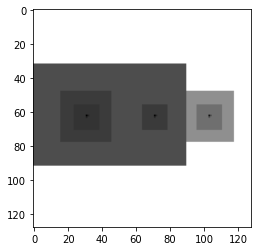

In [132]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

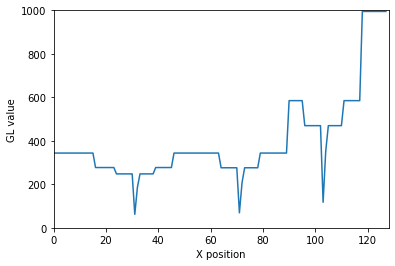

In [133]:
plotLineH(dImage, int(125/f))

In [144]:
# Detection
# dImageNoise -> The detected image, under the hypothesis of Poisson distribution.
f= 0.5
dImageNoise= detectorNoiseFullP(qImage, int(size/f), int(size/f))

0.5 0.5


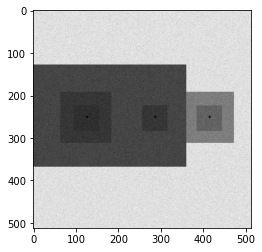

In [145]:
plt.imshow(dImageNoise.T, cmap="gray")
plt.show()

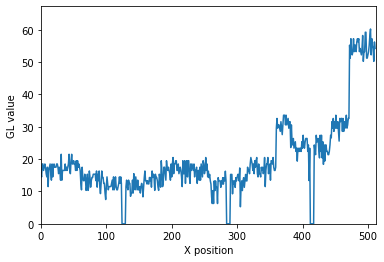

In [146]:
plotLineH(dImageNoise, int(125/f))

EXPERIMENTS

Experiment 1. Microcalcification visualization.

In [162]:
# SOURCE
kVp= 30
I0= 250  
N0, eE= source(kVp, I0)
print(N0, eE)

250 12.0


In [163]:
# OBJECT

size= 256
obj= breast_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_adipose: 2.2720000000000002
coef_breast: 3.1907639999999997
coef_soft: 4.14142


In [164]:
# MICROCALCIFICATION INSERTION
fName= "./coefs/coefAtenuacionCalcium.csv"
mu= getCoef(fName, eE)
sArtifact= 2

pos_1= [63, 125, 125]
obj_microCal= insertArtifact(obj, pos_1, sArtifact, mu)

pos_2= [143, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_2, sArtifact, mu)

pos_3= [207, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_3, sArtifact, mu)

In [165]:
# INTERACTION

prj= 'lateral'
qImage= interactor_PR(N0, obj_microCal, prj)

Experiment 1.1. Baseline --> Quantum Image Resolution == Detected Image Resolution

In [166]:
f= 1
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

1.0 1.0


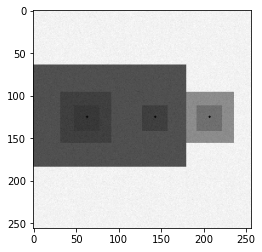

In [167]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

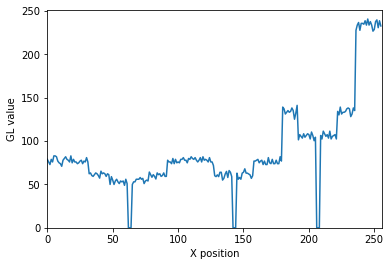

In [168]:
plotLineH(dImage, int(125/f))

Experiment 1.2. Quantum Image Resolution < Detected Image Resolution

In [169]:
f= 0.5
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

0.5 0.5


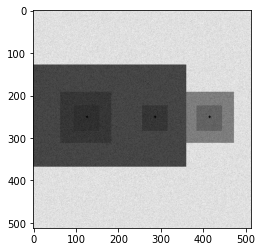

In [172]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

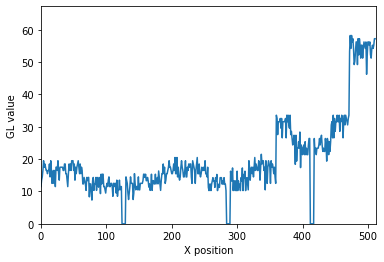

In [171]:
plotLineH(dImage, int(125/f))

Experiment 1.3. Quantum Image Resolution > Detected Image Resolution

In [173]:
f= 4
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

4.0 4.0


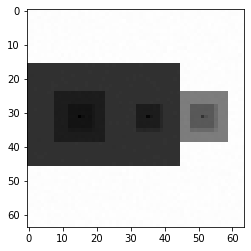

In [175]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

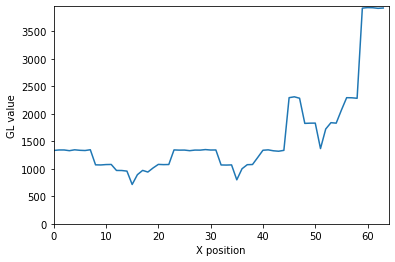

In [176]:
plotLineH(dImage, int(125/f))

Experiment 2. Noise vs Spatial Resolution Analysis.

In [177]:
# SOURCE

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 12.0


In [179]:
# OBJECT

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


In [180]:
# INTERACTION

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

Experiment 2.1. Baseline --> Quantum Image Resolution == Detected Image Resolution

In [181]:
# DETECTION

f= 1
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

1.0 1.0


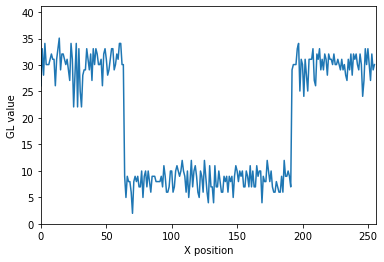

In [182]:
plotLineH(dImage, int(120/f))

In [183]:
# SNR 1

w= 10
snr_1= getSNR(dImage, 128, 128, w)

print(f'SNR 1: {snr_1: .3f}')

SNR 1:  4.471


Experiment 2.2. Quantum Image Resolution < Detected Image Resolution

In [184]:
# DETECTION

f= 0.5
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

0.5 0.5


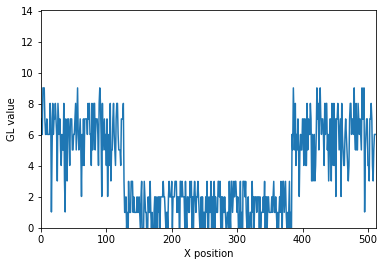

In [185]:
plotLineH(dImage, int(120/f))

In [186]:
# SNR 2

w= 10
snr_2= getSNR(dImage, 256, 256, w)

print(f'SNR 1: {snr_2: .3f}')

SNR 1:  1.012


Experiment 2.3. Quantum Image Resolution > Detected Image Resolution

In [187]:
# DETECTION

f= 4
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

4.0 4.0


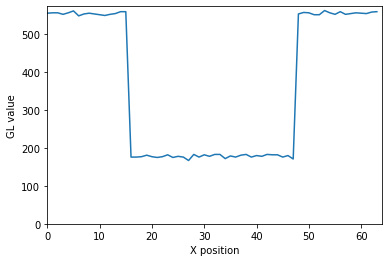

In [188]:
plotLineH(dImage, int(120/f))

In [189]:
# SNR 3
w= 10
snr_3= getSNR(dImage, 32, 32, w)

print(f'SNR 3: {snr_3: .3f}')

SNR 3:  49.276


In [190]:
print(f'SNR 1: {snr_1: .3f}')
print(f'SNR 2: {snr_2: .3f}')
print(f'SNR 3: {snr_3: .3f}')

SNR 1:  4.471
SNR 2:  1.012
SNR 3:  49.276


In [191]:
assert snr_1 > snr_2 and snr_1 < snr_3, "Something wrong happens"